In [19]:
(8 + 4) % 5 + 1

3

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/home/vlad_322/Downloads/NationalNames.csv')

data.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [21]:
data.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [22]:
data.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [23]:
unique_names_count = data['Name'].nunique()
unique_names_count

93889

In [24]:
unique_names_by_gender = data.groupby('Gender')['Name'].nunique()

unique_names_by_gender

Gender
F    64911
M    39199
Name: Name, dtype: int64

In [25]:
male_names_2010 = data[(data['Year'] == 2010) & (data['Gender'] == 'M')]

top_5_male_names_2010 = male_names_2010.sort_values(by='Count', ascending=False).head(5)

top_5_male_names_2010

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


In [26]:
data_1947 = data[data['Year'] == 1947]
most_popular_name_1947 = data_1947.loc[data_1947['Count'].idxmax()]
print(f"The name is '{most_popular_name_1947['Name']}' in 1947.")

The name is 'Linda' in 1947.


In [27]:
min_count = data['Count'].min()

min_count_records = data[data['Count'] == min_count].shape[0]
min_count_records

254615

In [28]:
unique_names_per_year = data.groupby('Year')['Name'].nunique()

unique_names_per_year

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

In [29]:
year_with_most_unique_names = unique_names_per_year.idxmax()
max_unique_names = unique_names_per_year.max()

print(f"Рік із найбільшою кількістю унікальних імен: {year_with_most_unique_names} (кількість унікальних імен: {max_unique_names})")

data_most_unique_year = data[data['Year'] == year_with_most_unique_names]
most_popular_name = data_most_unique_year.loc[data_most_unique_year['Count'].idxmax()]
most_popular_name['Name']

Рік із найбільшою кількістю унікальних імен: 2008 (кількість унікальних імен: 32488)


'Jacob'

In [30]:
# Групування даних за роком і статтю, обчислення загальної кількості народжень по роках і статі
birth_counts = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()
years_more_girls = (birth_counts['F'] > birth_counts['M']).sum()

print(years_more_girls)

54


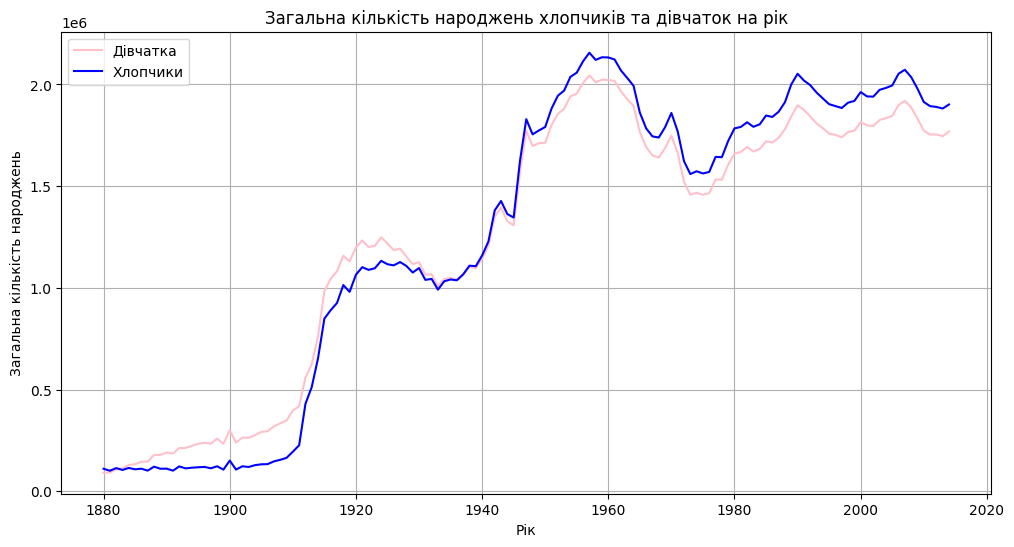

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(birth_counts.index, birth_counts['F'], label='Дівчатка', color='pink')
plt.plot(birth_counts.index, birth_counts['M'], label='Хлопчики', color='blue')


plt.xlabel('Рік')
plt.ylabel('Загальна кількість народжень')
plt.title('Загальна кількість народжень хлопчиків та дівчаток на рік')
plt.legend()
plt.grid(True)

plt.show()

In [32]:
neutral_names = data.groupby('Name')['Gender'].nunique()
gender_neutral_names = neutral_names[neutral_names > 1]

print(gender_neutral_names.count())

10221


In [33]:
barbara_boys_count = data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]['Count'].sum()

print(barbara_boys_count)

4139


In [34]:
neutral_names = data.groupby('Name')['Gender'].nunique()
neutral_names = neutral_names[neutral_names > 1].index.tolist()

neutral_data = data[data['Name'].isin(neutral_names)]

years_present = neutral_data.groupby('Name')['Year'].nunique()
names_in_all_years = years_present[years_present == len(data['Year'].unique())].index.tolist()

print("Гендерно-нейтральні імена, присутні в кожному році:")
for index, name in enumerate(names_in_all_years):
    print(f"{index} {name}")

Гендерно-нейтральні імена, присутні в кожному році:
0 Aaron
1 Abbie
2 Abel
3 Abigail
4 Abraham
5 Ada
6 Adam
7 Addie
8 Addison
9 Adele
10 Adeline
11 Adrian
12 Agnes
13 Aimee
14 Al
15 Albert
16 Alberta
17 Alden
18 Alex
19 Alexander
20 Alfred
21 Alice
22 Aline
23 Allan
24 Allen
25 Allie
26 Alma
27 Alonzo
28 Alpha
29 Alta
30 Althea
31 Alton
32 Alva
33 Alvin
34 Alvina
35 Amanda
36 Amelia
37 America
38 Amie
39 Amos
40 Amy
41 Anastasia
42 Anderson
43 Andrew
44 Andy
45 Angela
46 Angelina
47 Angeline
48 Angie
49 Anita
50 Ann
51 Anna
52 Annabelle
53 Anne
54 Annette
55 Annie
56 Anthony
57 Antoinette
58 Anton
59 Antonia
60 Antonio
61 Ara
62 Archie
63 Arnold
64 Aron
65 Art
66 Arthur
67 Asa
68 Aubrey
69 August
70 Augusta
71 Augustine
72 Augustus
73 Austin
74 Ava
75 Avery
76 Bailey
77 Barbara
78 Basil
79 Beatrice
80 Bella
81 Ben
82 Benjamin
83 Bennett
84 Bennie
85 Bernard
86 Bernice
87 Bert
88 Bertha
89 Bess
90 Bessie
91 Betsy
92 Betty
93 Bill
94 Blanche
95 Bob
96 Bonnie
97 Boyd
98 Bridget
99 Bruce
1

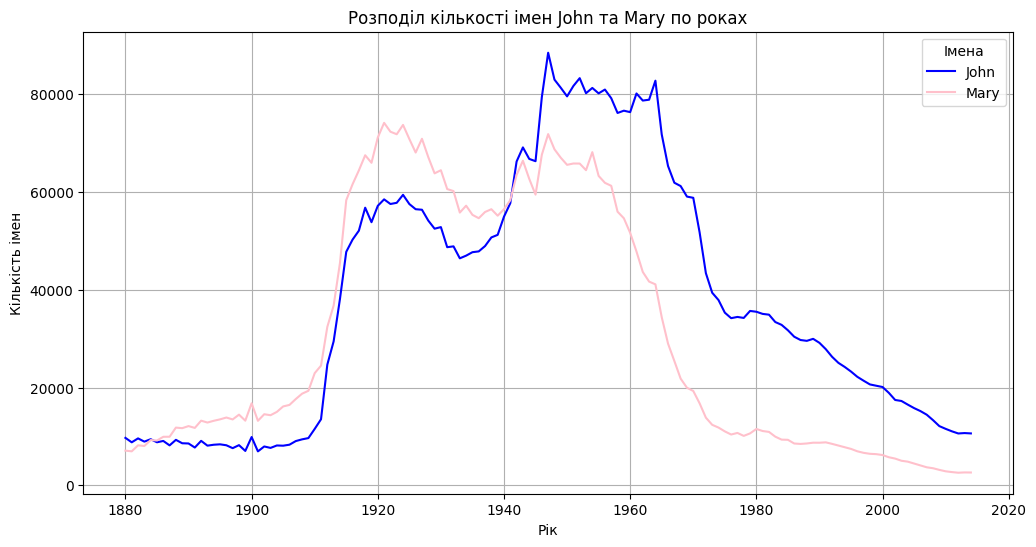

In [35]:
names_to_plot = ['John', 'Mary']
filtered_data = data[data['Name'].isin(names_to_plot)]

name_counts = filtered_data.groupby(['Year', 'Name'])['Count'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
plt.plot(name_counts.index, name_counts['John'], label='John', color='blue')
plt.plot(name_counts.index, name_counts['Mary'], label='Mary', color='pink')

plt.title('Розподіл кількості імен John та Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість імен')
plt.legend(title='Імена')
plt.grid(True)

plt.show()

In [36]:
most_popular_names = data.loc[data.groupby('Year')['Count'].idxmax()]

most_popular_names = most_popular_names[['Year', 'Name', 'Count']]

print(most_popular_names)

         Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
...       ...       ...    ...
1657592  2010  Isabella  22883
1691633  2011    Sophia  21816
1725502  2012    Sophia  22267
1759186  2013    Sophia  21147
1792389  2014      Emma  20799

[135 rows x 3 columns]
